# **PRÁCTICA 2 OPTICA III**

**JULIO DAVID RUIZ MENDOZA 23958366W**

---

In [236]:
from scipy.special import jv, sinc
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import cm as cm
import numpy as np
def extents(f):
    delta = f[1] - f[0]
    return f[0] - delta / 2, f[-1] + delta / 2

**1. Generar una matriz bidimensional que represente la función de Airy:**

$$ I(r) = |\frac{J_1(r)}{r}|^2 $$

**Existen  diferentes  maneras  de  controlar  el  muestreo  de  la  función.  Elegir  y  especificar  una  de
ellas**

In [237]:
def Ir(r):
    return abs(jv(1,r)/r)**2

def r_mesh(L, frec_muestreo):
    step = 1 / frec_muestreo
    coord = np.arange(-L, L, step)
    x, y = np.meshgrid(coord, coord, indexing = "ij") #mallado
    r = np.sqrt(x**2 + y**2)
    return r


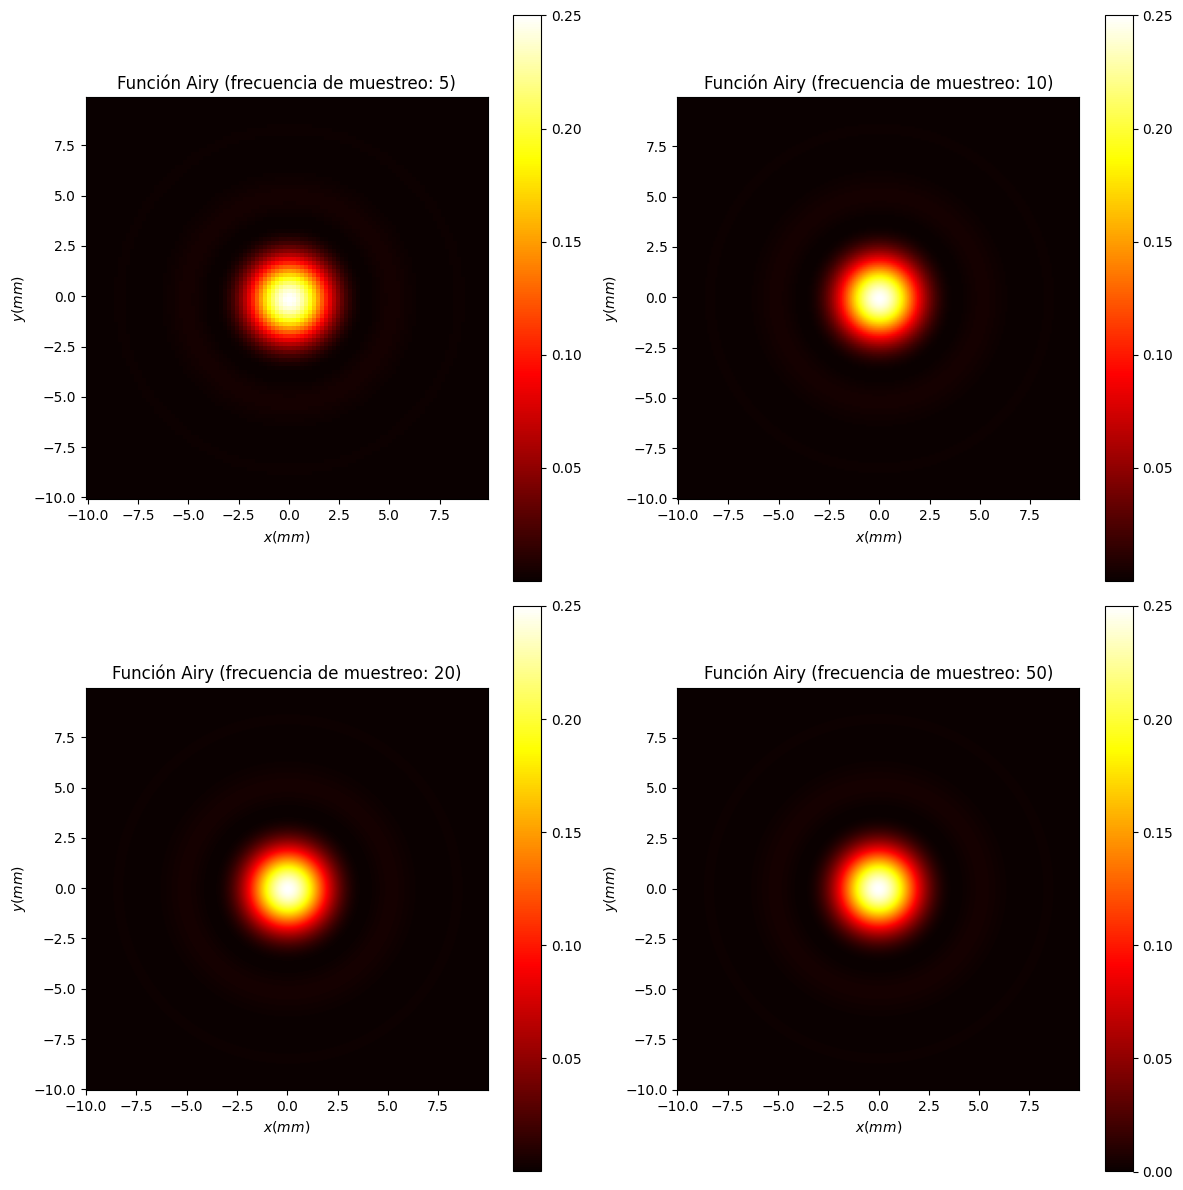

In [238]:
%matplotlib inline

sampling_frequencies = [5, 10, 20, 50] # Re-define frequencies
L = 10 # Limite para el mallado
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.flatten() # Aplanar el array de axes para fácil iteración

for idx, freq in enumerate(sampling_frequencies):
    r= r_mesh(L, freq)
    coord = np.arange(-L, L, 1/freq)

    im = ax[idx].imshow( Ir(r), extent=2*extents(coord), cmap = cm.hot )
    ax[idx].set_title(f"Función Airy (frecuencia de muestreo: {freq})")
    ax[idx].set_xlabel("$x (mm) $")
    ax[idx].set_ylabel("$y (mm) $")
    fig.colorbar(im, ax=ax[idx]) # Añadir colorbar individual para cada subplot

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

2. Calcular la transformada de Fourier discreta de la función anterior y representarla como una
imagen

$$ |FT[I(r)]|^2 $$

Estudiar el efecto del cambio de valor un parámetro que varíe el muestreo en el espectro de la
función anterior. ¿Cómo se manifiesta el “aliasing” en la imagen de la transformada de Fourier.

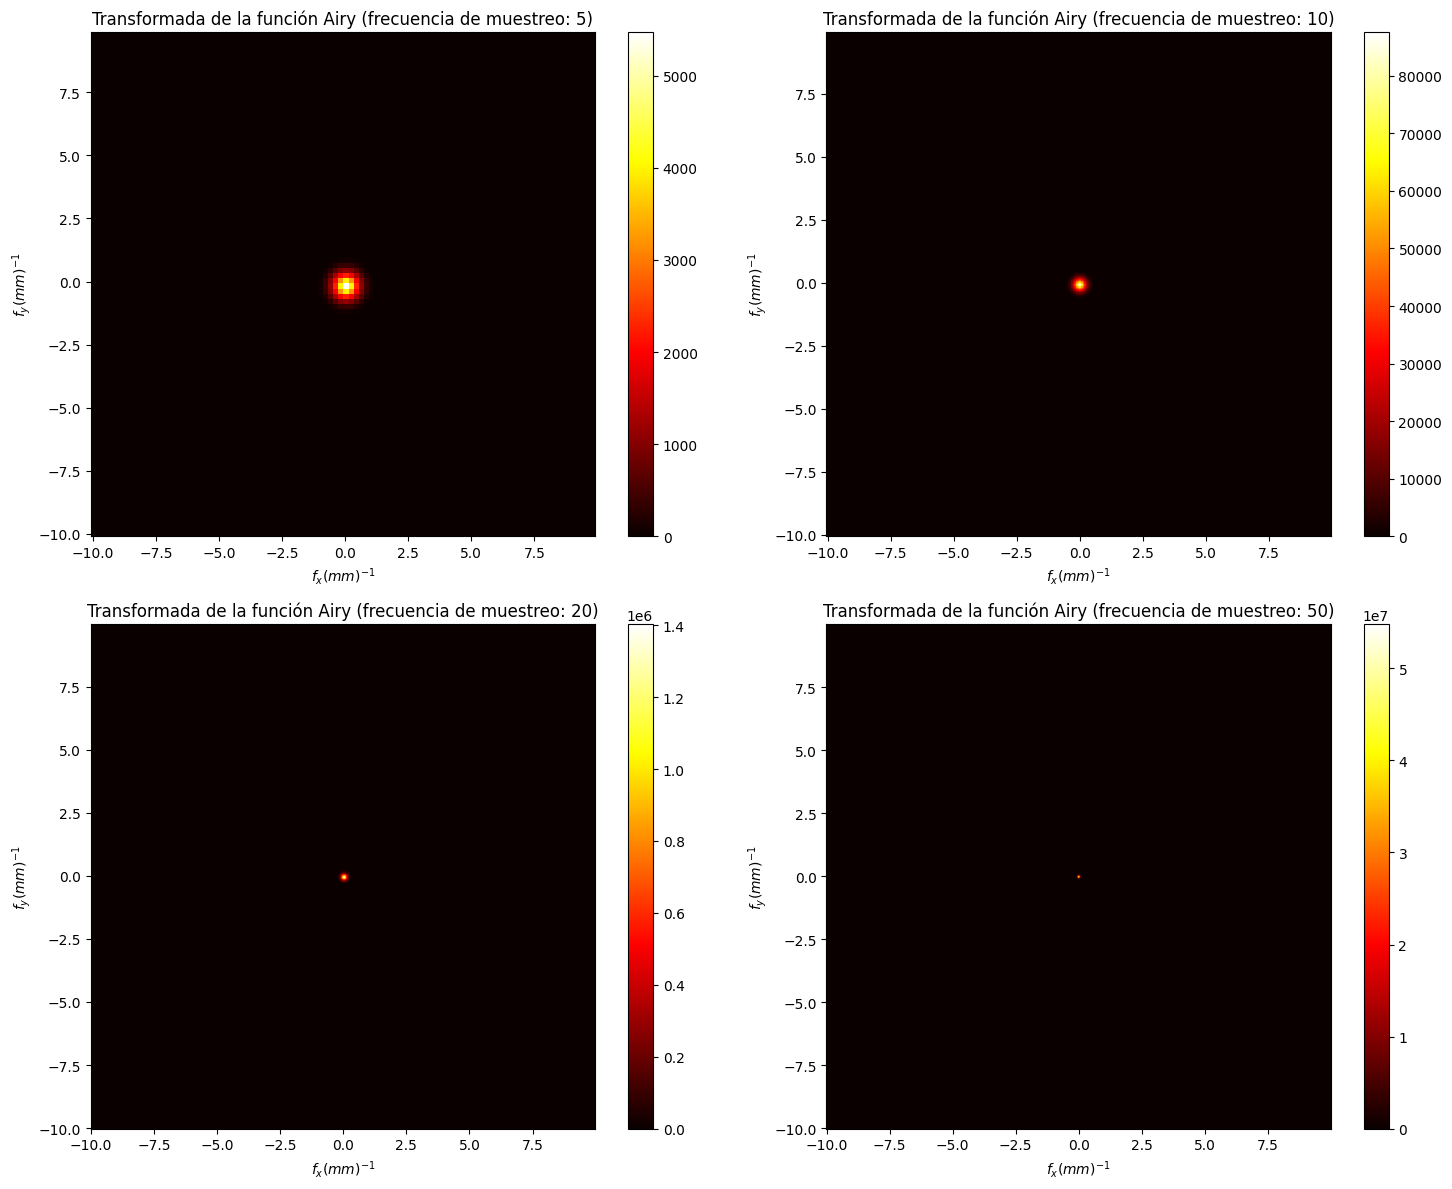

In [239]:
from scipy.fft import fft2

# sampling_frequencies = [5, 10, 20, 50] # same as before
# L = 10

fig, ax = plt.subplots(2,2,figsize=(15,12))
ax = ax.flatten() # Aplanar el array de axes para fácil iteración

for idx, freq in enumerate(sampling_frequencies):
    r = r_mesh(L, freq)
    coord = np.arange(-L, L, 1/freq)

    FTIr = np.fft.fftshift(np.fft.fft2(Ir(r)))
    FTIr2 = abs(FTIr)**2

    im = ax[idx].imshow( FTIr2, extent=2*extents(coord) , cmap = cm.hot )
    ax[idx].set_title(f"Transformada de la función Airy (frecuencia de muestreo: {freq})")
    ax[idx].set_xlabel("$f_x (mm)^{-1} $")
    ax[idx].set_ylabel("$f_y (mm)^{-1} $")
    fig.colorbar(im, ax=ax[idx])

plt.tight_layout()
plt.show()

Al aumentar la frecuencia de muestreo ocurre lo siguiente:
- La transformada de Fourier (discreta) de la función de Airy decrece cada vez más en tamaño.
- El fenómeno del aliasing se presenta cada vez con menor intensidad, llegando a obtener un "circulito"
más "suave".

**3. Calcular la transformada de fourier discreta de las funciones $circ(\frac{r}{a})$ y $rect(\frac{x}{a})rect(\frac{y}{a})$. Dónde a = 5 mm. Representar las escalas adecuadas tanto en el espacio directo como en el recíproco.**



In [240]:
def rect(x):
    if abs(x) < 1/2:
        return 1
    elif abs(x) == 1/2:
        return 1/2
    else:
        return 0



def circ(r):
    if r <= 1:
        return 1
    elif r == 1/2:
        return 1/2
    else:
        return 0


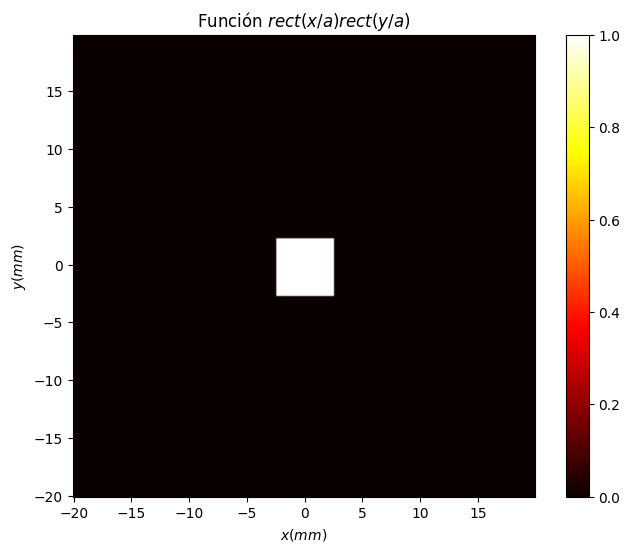

In [241]:
x = np.arange(-20,20,0.2)
y = np.arange(-20,20,0.2)
a = 5

rectx = np.array([rect(i/a) for i in x])
recty = np.array([rect(i/a) for i in y])

rectx, recty = np.meshgrid(rectx, recty)

rectf = rectx*recty

%matplotlib inline
plt.figure(figsize = (8,6))
plt.title("Función $rect(x/a)rect(y/a)$")
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.imshow( rectf, extent=2*extents(x) , cmap = cm.hot )
plt.colorbar()
plt.show()




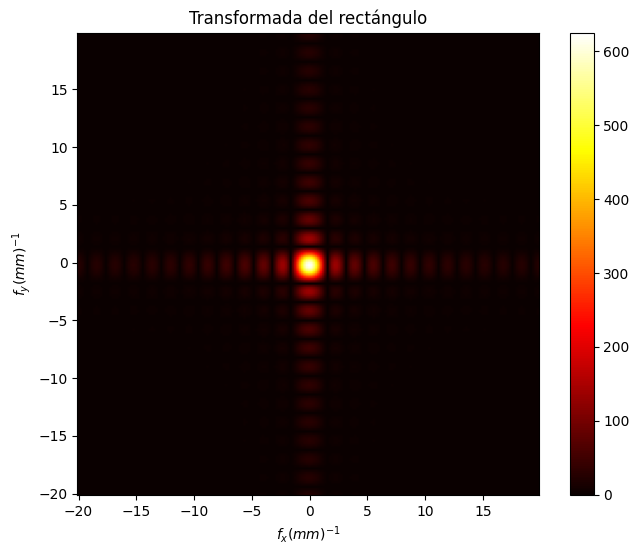

In [242]:
FTrectf = np.fft.fftshift(np.fft.fft2(rectf))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.title("Transformada del rectángulo")
plt.xlabel("$f_x (mm)^{-1} $")
plt.ylabel("$f_y (mm)^{-1} $")
plt.imshow( abs(FTrectf), extent=2*extents(x), cmap = cm.hot )
plt.colorbar()
plt.show()


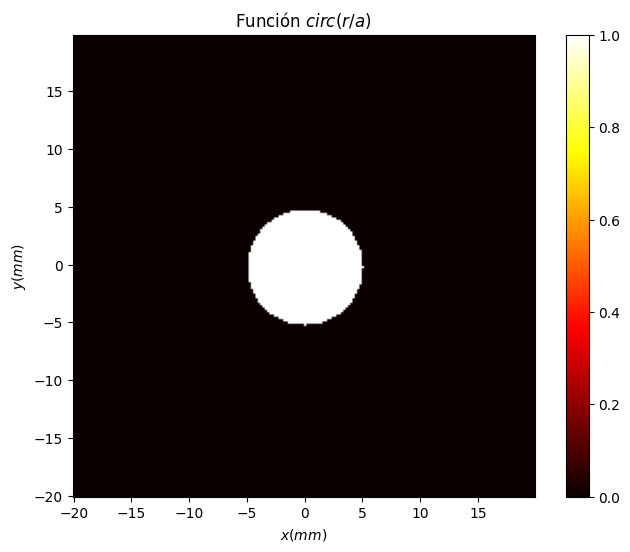

In [243]:

x = np.arange(-20, 20, 0.2)
y = np.arange(-20, 20, 0.2)

x_v, y_v = np.meshgrid(x, y)

r = np.sqrt(x_v**2 + y_v**2)

circf = np.zeros(r.shape)


for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        circf[i, j] = circ(r[i, j]/a)

plt.figure(figsize = (8,6))
plt.title("Función $circ(r/a)$")
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.imshow(circf, extent=2*extents(x), cmap = cm.hot )
plt.colorbar()
plt.show()


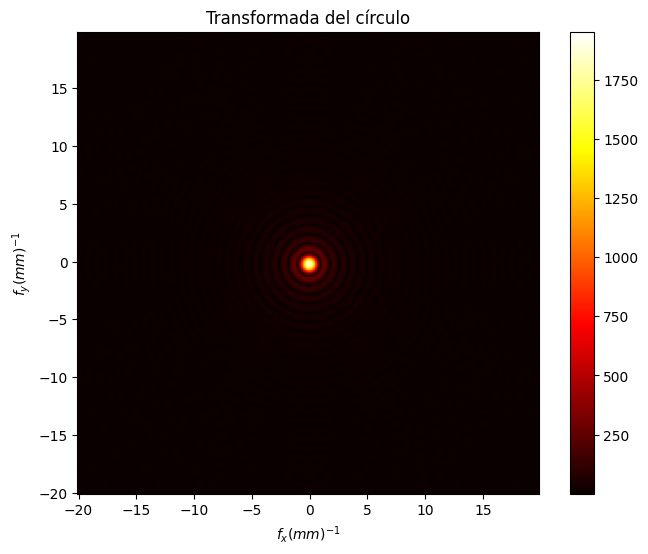

In [244]:
FTcircf = np.fft.fftshift(np.fft.fft2(circf))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.title("Transformada del círculo")
plt.xlabel("$f_x (mm)^{-1} $")
plt.ylabel("$f_y (mm)^{-1} $")
plt.imshow( abs(FTcircf), extent=2*extents(x), cmap = cm.hot )
plt.colorbar()
plt.show()


**4.En alguno de los dos casos anteriores incluir una rampa (plano inclinado) de fase (equivalente
a  simular  la  iluminación  de  una  apertura  -descrita  como  alguna  de  las  funciones  anteriores-
con  una  onda  plana  que  se  propaga  con  cierto  ángulo  respecto  al  eje  óptico).  Explicar  su
efecto en la transformada de Fourier.**  

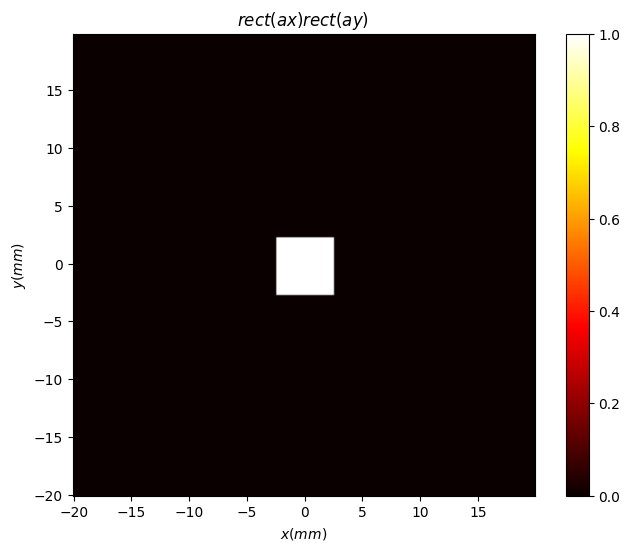

In [245]:

ang = np.pi   # ángulo
x = np.arange(-20, 20, 0.2)
y = np.arange(-20, 20, 0.2)
dim=x.size

f=np.zeros((dim,dim),dtype=complex)
for i in range(dim):
    for j in range(dim):
        if abs(x[i]) < a/2 and abs(y[j]) < a/2 :
            f[i,j] = 1 * np.exp ( 1j * ang * x[i] )


tf = np.fft.fft2(f)
tf=np.fft.fftshift(tf)

tf=abs(tf)**2


plt.figure(figsize = (8,6))
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.title("$rect(ax)rect(ay)$ ")
plt.imshow(rectf, extent = 2*extents(x), cmap = cm.hot)
plt.colorbar()
plt.show()

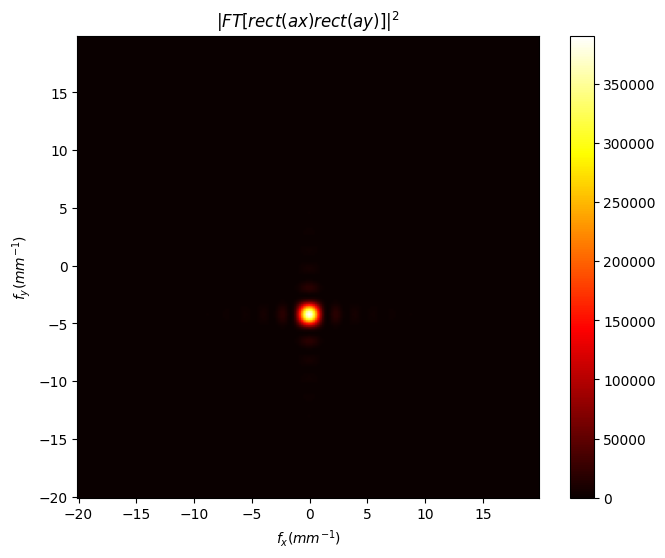

In [246]:
plt.figure(figsize = (8,6))
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("$|FT[rect(ax)rect(ay)]|^2$ ")
plt.imshow(tf,extent= 2*extents(x), cmap=cm.hot)
plt.colorbar()
plt.show()

La función original no se ve afectada, sin embargo la transformada se ve desplazada.

**5. Comprobar que se cumple el teorema de Parseval.**

$$ \int_{-\infty}^{\infty} \left | f(t) \right |^2 dt = \int_{-\infty}^{\infty} \left | \mathcal{F}[f(t)] \right |^2 dt$$



Usaremos la funcion cuadrado.

In [247]:
def rect_cuadrado(x):
    return np.abs(rect(x))**2

def sinc_cuadrado(x):
    return np.abs(sinc(x))**2

#Integral de la funcion rect
a = quad(rect_cuadrado, -5, 5)

#Integral de la inversa
b = quad(sinc_cuadrado, -30, 30)

print(a[0],b[0])

1.0000000000000002 0.9966228172585513


**6. Obtener la transformada de Fourier de la red**

$$ t(x,y) = \frac{1}{2} (1 + cos(2\pi f_x x))$$

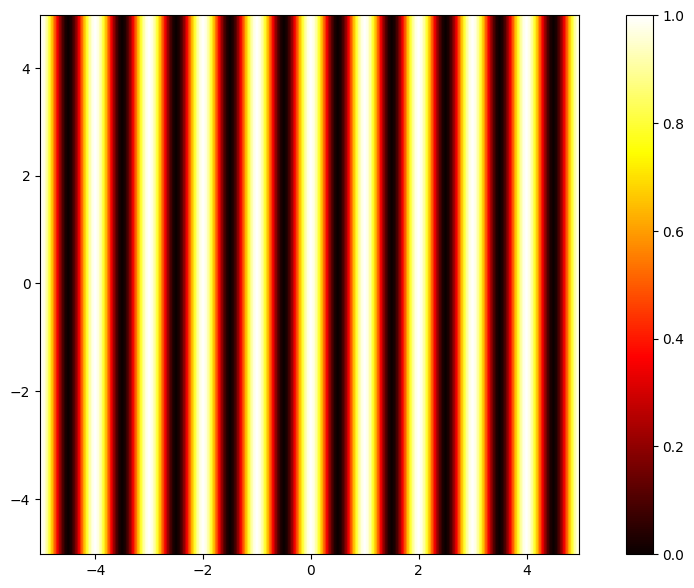

In [248]:

def tx(x,y,f_x):
  return (1 + np.cos(2* np.pi * f_x * x))/2

f_x = 1
dx=0.05
coord = np.arange(-5, 5, dx)
x, y = np.meshgrid(coord, coord)

tx_6 = tx(x,y,f_x)
plt.figure(figsize = (12,7))
plt.imshow(abs(tx_6),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.show()

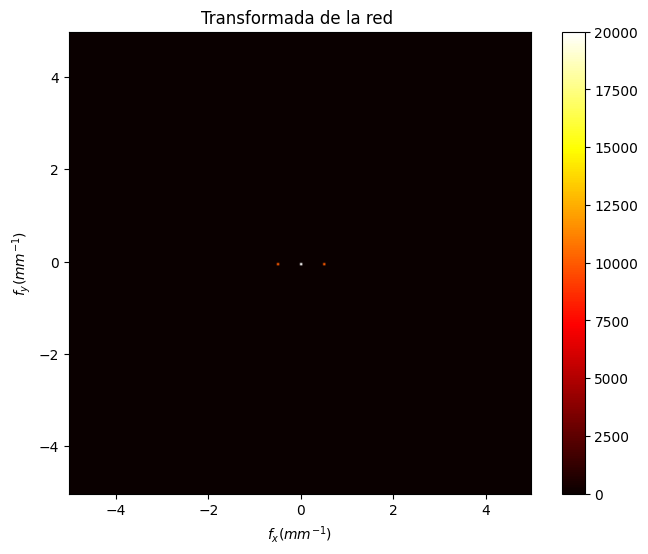

In [249]:
FTtx = np.fft.fftshift(np.fft.fft2(tx_6))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red ")
plt.show()

**7. Encontrar cuál es la frecuencia máxima que se puede representar sin “aliasing”.**

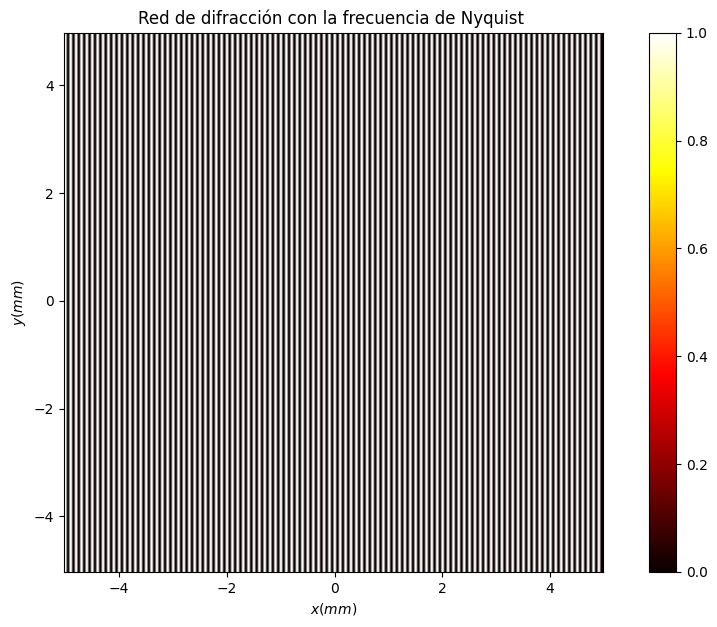

10.0


In [250]:
f_N = 1/(2*dx)  #freq de Nyquist

tN = tx(x,y,f_N)


plt.figure(figsize = (12,7))
plt.imshow(abs(tN),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.title("Red de difracción con la frecuencia de Nyquist ")
plt.show()

print(f_N)

Cuando la frecuencia de la red ($f_x$) es igual a la frecuencia de Nyquist ($f_N = 1/(2\Delta x)$), donde $\Delta x$ es el paso de muestreo, se observan cambios significativos:

*   **Desaparición del aliasing:** En el caso de una red infinita, el aliasing se manifestaría como el solapamiento de los órdenes de difracción. Al usar la frecuencia de Nyquist, estamos en el límite de lo que el muestreo puede representar correctamente. Si estuviéramos por encima de esta frecuencia, veríamos el efecto espejo del aliasing.
*   **Colapso del patrón de difracción:** En la transformada de Fourier, los picos de difracción de la red, que normalmente aparecerían en $\pm f_x$, se "fusionan" o se sitúan en los bordes del espectro discreto, lo que es característico de la frecuencia más alta que se puede representar. Debido a la limitación espacial por la función rectangular, estos picos se ensanchan en funciones sinc. Si la frecuencia de la red se acerca a la de Nyquist, las funciones sinc resultantes de la convolución se superpondrán de tal manera que el patrón de difracción resultante tenderá a colapsar, o a mostrar un patrón más parecido a la transformada de Fourier de una rendija cuadrada (una función sinc 2D) con los lóbulos principales en las frecuencias más altas representables por el muestreo, en lugar de los picos bien definidos de una red de baja frecuencia. Esto ocurre porque la red en $f_N$ se representa como un patrón alterno de 0s y 1s en la malla discreta, y su transformada se extiende a los límites del dominio de Fourier.

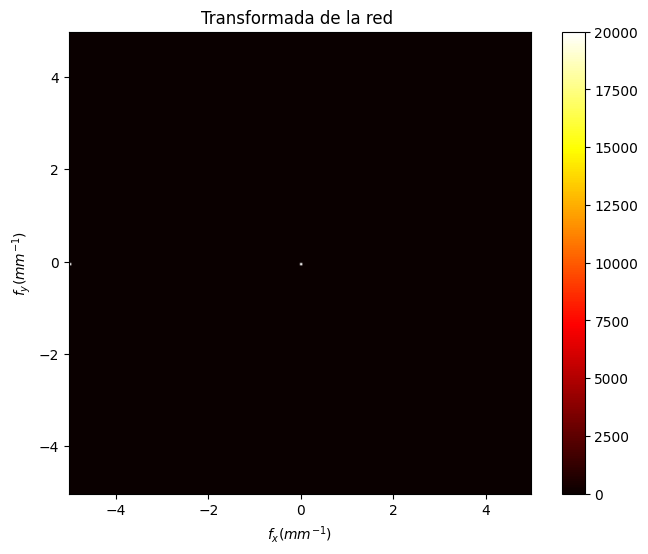

In [251]:
FTtx = np.fft.fftshift(np.fft.fft2(tN))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx), extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red ")
plt.show()

Las deltas se juntan mientras que a continuación si nos separamos un poco de la frecuencia podemos verlas en el límite.

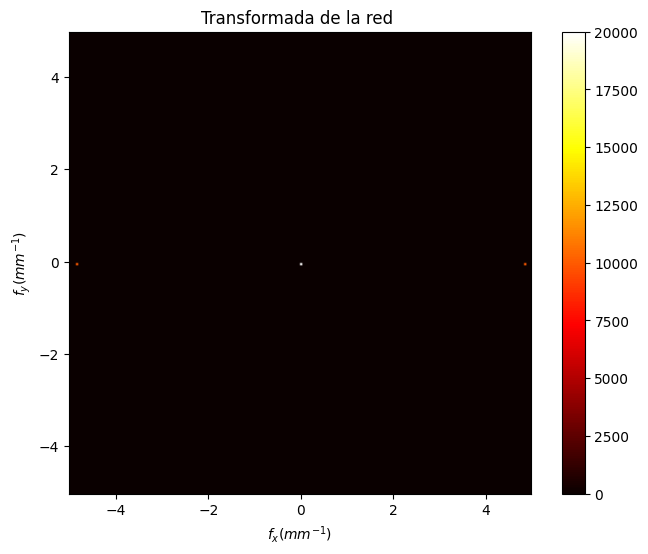

In [252]:
ttx = (1 + np.cos(2* np.pi * (f_N-0.3) * x))/2
FTtx = np.fft.fftshift(np.fft.fft2(ttx))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx), extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red ")
plt.show()

**8. Comprobar el efecto de la limitación espacial de la red mediante la función**

$$ t(x,y) = \frac{1}{2} (1 + cos(2\pi f_x x))rect(ax)rect(ay)$$

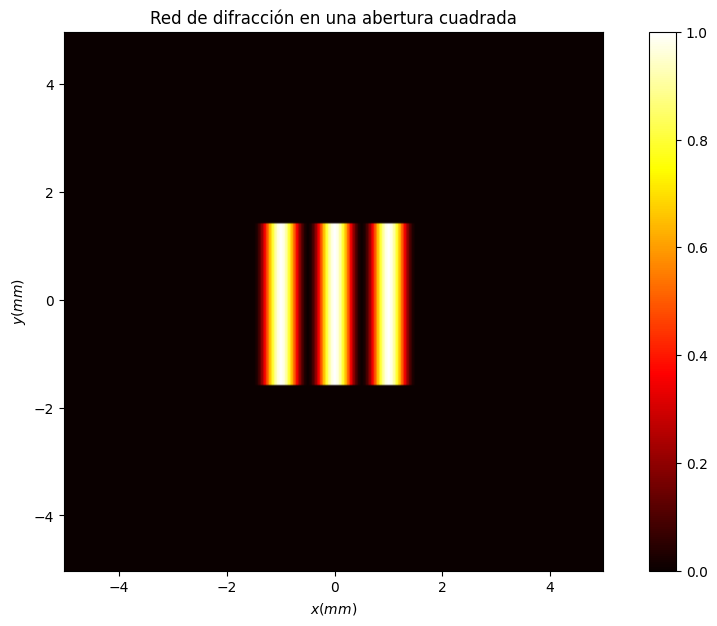

In [253]:
xx = np.arange(-5,5,dx)
yy = np.arange(-5,5,dx)
a = 3

rectx = np.array([rect(i/a) for i in xx])
recty = np.array([rect(i/a) for i in yy])

rectx, recty = np.meshgrid(rectx, recty)

rectf = rectx*recty

txrect = tx(x,y,f_x)* rectf


plt.figure(figsize = (12,7))
plt.imshow(abs(txrect),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.title("Red de difracción en una abertura cuadrada")
plt.show()

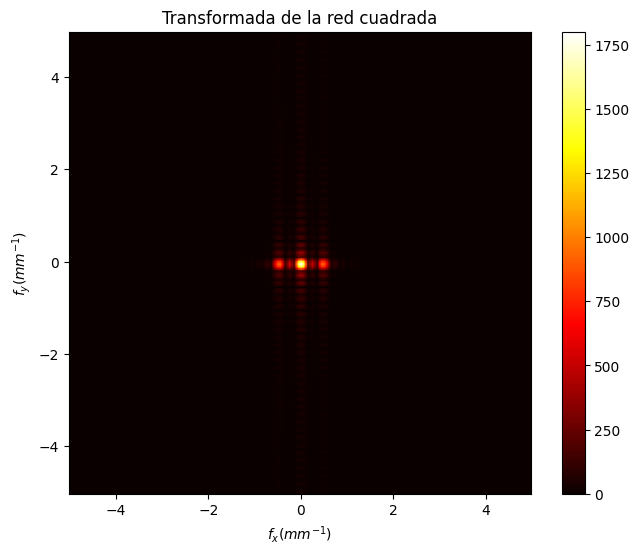

In [254]:
FTtx = np.fft.fftshift(np.fft.fft2(txrect))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red cuadrada")
plt.show()

Al multiplicar la función de la red $t(x,y) = \frac{1}{2} (1 + cos(2\pi f_x x))$ por las funciones $rect(ax)rect(ay)$, estamos aplicando una ventana espacial a la red. Esto significa que la red solo existe dentro de los límites definidos por el rectángulo.

En el dominio de Fourier, la multiplicación en el dominio espacial se traduce en una convolución en el dominio de la frecuencia. La transformada de Fourier de la red infinita (sin limitación) consistiría en deltas de Dirac en $\pm f_x$ y en el origen. La transformada de Fourier de la función rectangular es una función sinc. Por lo tanto, el efecto de la limitación espacial es "ensanchar" estas deltas, convirtiéndolas en funciones sinc centradas en las frecuencias correspondientes. Esto se observa como un patrón de difracción más extendido y con lóbulos laterales alrededor de los picos principales, en lugar de puntos discretos.

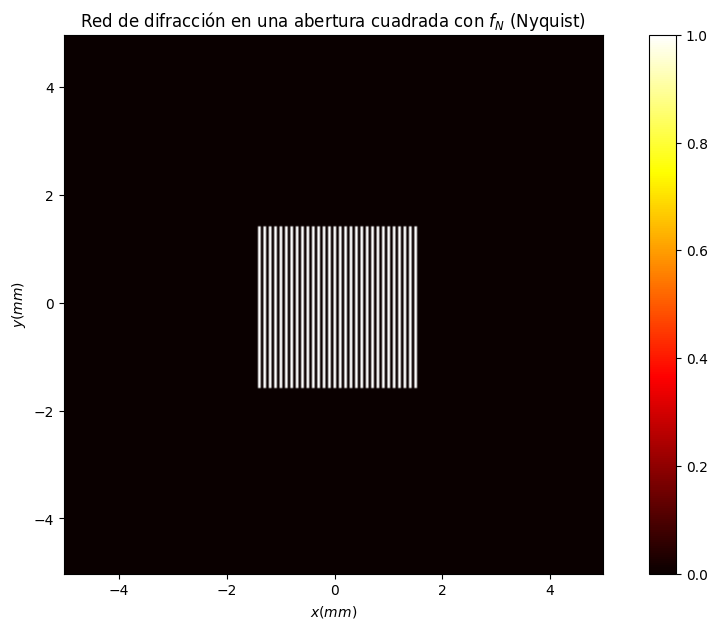

In [255]:
xx = np.arange(-5,5,dx)
yy = np.arange(-5,5,dx)
a = 3

rectx = np.array([rect(i/a) for i in xx])
recty = np.array([rect(i/a) for i in yy])

rectx, recty = np.meshgrid(rectx, recty)

rectf = rectx*recty

txrectN = tN * rectf


plt.figure(figsize = (12,7))
plt.imshow(abs(txrectN),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.title("Red de difracción en una abertura cuadrada con $f_N$ (Nyquist)")
plt.show()

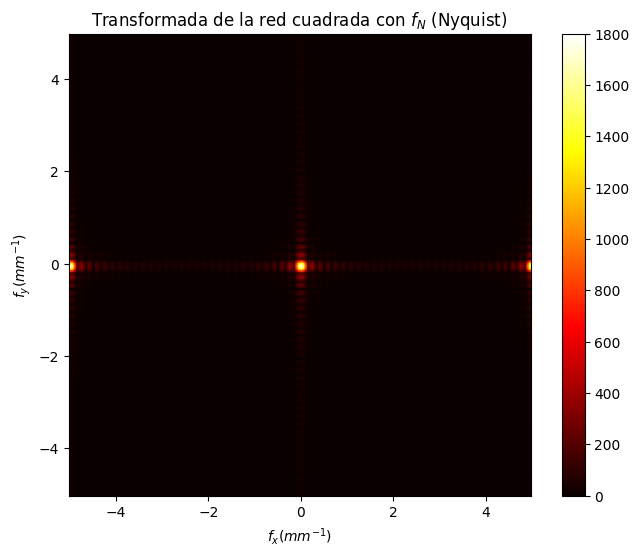

In [256]:
FTtx_nyquist = np.fft.fftshift(np.fft.fft2(txrectN))


%matplotlib inline
plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx_nyquist),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red cuadrada con $f_N$ (Nyquist)")
plt.show()

**9. Repetir el caso anterior con un giro de 45º de la red.**

In [257]:
xx = np.arange(-5,5,dx)
yy = np.arange(-5,5,dx)
xm, ym = np.meshgrid(xx, yy)

theta = np.pi/4

t45 = 0.5*( 1 + np.cos(2* np.pi * f_x * ( xm*np.cos(theta ) + ym*np.sin(theta)) ) ) * rectf

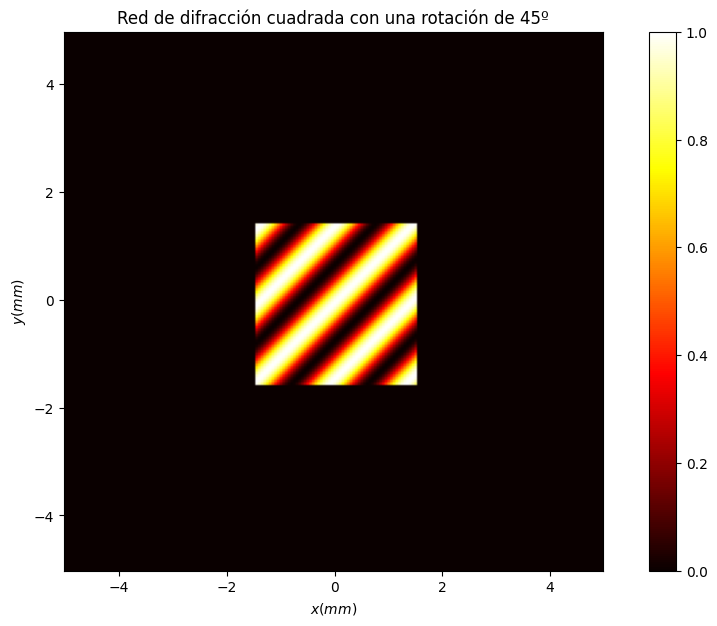

In [258]:


plt.figure(figsize = (12,7))
plt.imshow(abs(t45),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$x (mm) $")
plt.ylabel("$y (mm) $")
plt.title("Red de difracción cuadrada con una rotación de 45º")
plt.show()

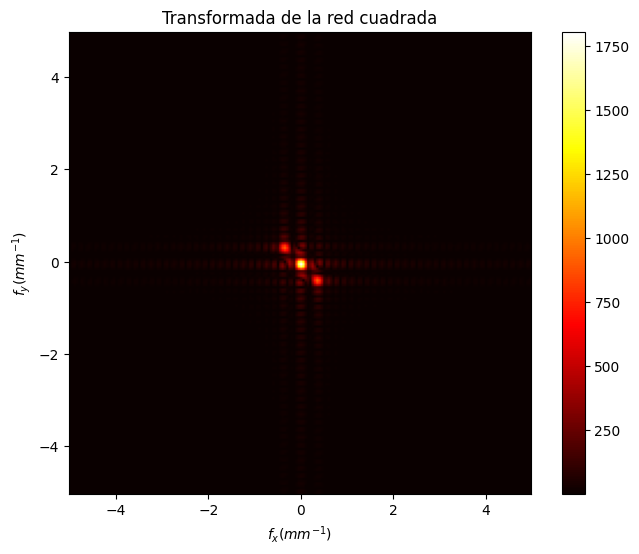

In [259]:
FTtx = np.fft.fftshift(np.fft.fft2(t45))


plt.figure(figsize = (8,6))
plt.imshow( abs(FTtx),extent= 2*extents(coord), cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la red cuadrada")
plt.show()

**10. Simular un sistema óptico 4-f para el filtrado de la imagen $I(x, y)$ suministrada utilizando filtros en forma de funciones $circ(ar)$ desplazadas respecto al centro. Estudiar el efecto de los filtros sobre el contenido espectral de la imagen.**

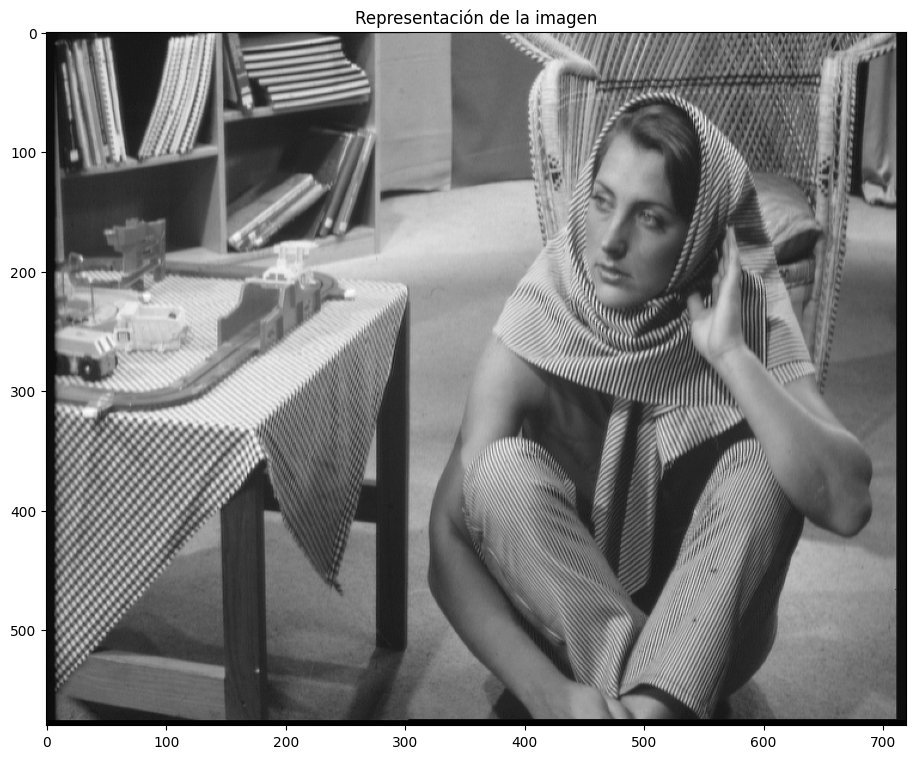

In [260]:
import matplotlib.image as img
imagen = img.imread("barbara.png")[:,:,0]

#Representacion de la imagen
plt.figure(figsize = (12,9))
plt.imshow( imagen , cmap=cm.gray )
plt.title("Representación de la imagen")
plt.show()

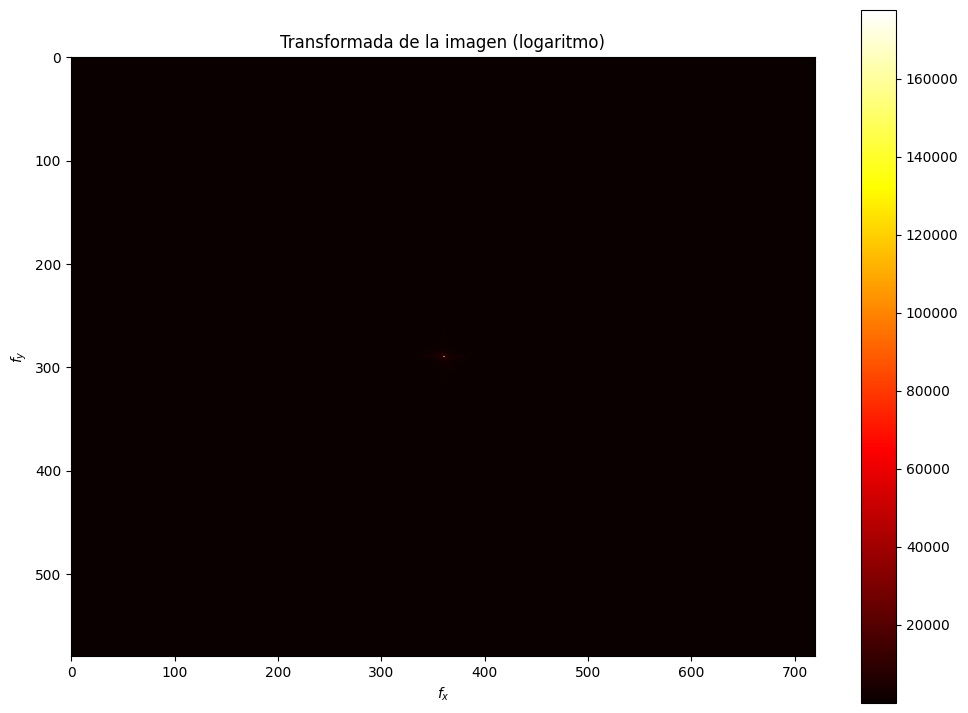

In [261]:
imagen_tf = np.fft.fftshift((np.fft.fft2(imagen)))
#Modulo de la TF al cuadrado
TF = np.abs(imagen_tf)

#Representacion de la TF
plt.figure(figsize = (12,9))
plt.imshow( TF, cmap = cm.hot )
plt.colorbar()
plt.xlabel("$f_x $")
plt.ylabel("$f_y $")
plt.title("Transformada de la imagen (logaritmo)")
plt.show()

Como no se ve nada vamos a aplicarle un logaritmo


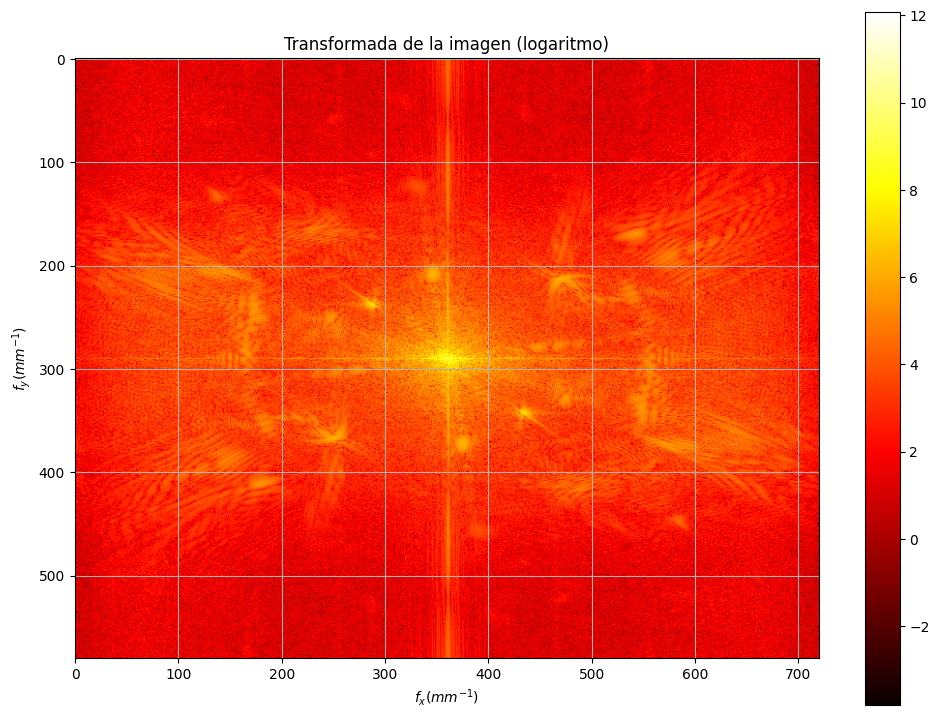

In [262]:
#Representacion de la TF
plt.figure(figsize = (12,9))
plt.imshow( np.log(TF), cmap = cm.hot )
plt.colorbar()
plt.grid()
plt.xlabel("$f_x (mm^{-1}) $")
plt.ylabel("$f_y (mm^{-1}) $")
plt.title("Transformada de la imagen (logaritmo)")
plt.show()

In [263]:
def circ2(x,y,a):
    Y,X = 580,720
    xx = np.arange(-X/2, X/2)
    yy = np.arange(-Y/2, Y/2)
    x_v, y_v = np.meshgrid(xx, yy)

    r = np.sqrt((x_v-x)**2 + (y_v-y)**2)

    circf = np.zeros(r.shape)


    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            circf[i, j] = circ(r[i, j]/a)
    return circf

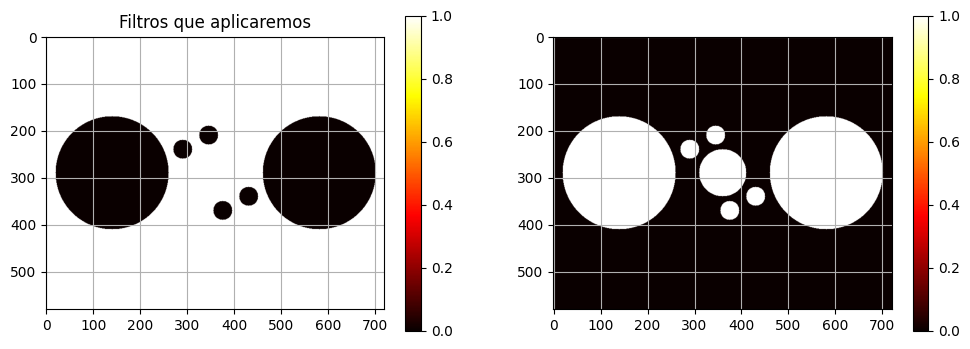

In [264]:
f1 =  circ2(-15,-80,20) + circ2(15,80,20)
f2 =  circ2(-70,-50,20) + circ2(70,50,20)
f3 =  circ2(-220,0,120) + circ2(220,0,120)
f4 =  1 - circ2(0,0, 190)
f5 =  circ2(0,180,80) + circ2(0,-180,80)
f6 =  circ2(0,0,50)

filtro1 = 1- (f1 + f2  + f3)

filtro2 = (f1 + f2  + f3 + f6)

pasabaja = circ2(0,0,50)


plt.figure(figsize = (12,9))

plt.subplot(2, 2, 1)
plt.title("Filtros que aplicaremos")
plt.grid()
plt.imshow(filtro1, cmap = cm.hot )
plt.colorbar()

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(filtro2, cmap = cm.hot )
plt.colorbar()
plt.show()

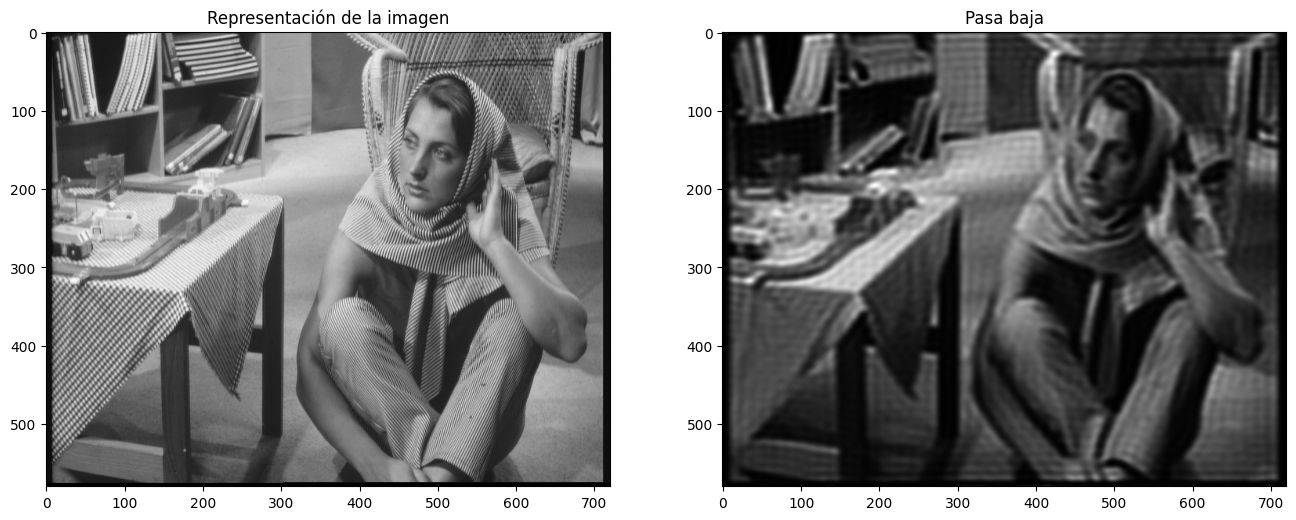

In [265]:
plt.figure(figsize = (16,18))

plt.subplot(2, 2, 1)
plt.imshow( imagen , cmap=cm.gray )
plt.title("Representación de la imagen")

plt.subplot(2, 2, 2)
plt.title("Pasa baja")
plt.imshow(np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_tf*pasabaja)))**2, cmap=cm.gray )
plt.show()



Vemos que los patrones de los libros de atras, el pantalon y el pañuelo desaparecen al aplicar el filtro pasa-baja.
Debajo hemos desarrollado unos filtros quitando bandas de frecuencia pesadas o solo dejando esas frecuencias, aplicado en la imagen abajo elimina o amplifica las franjas.

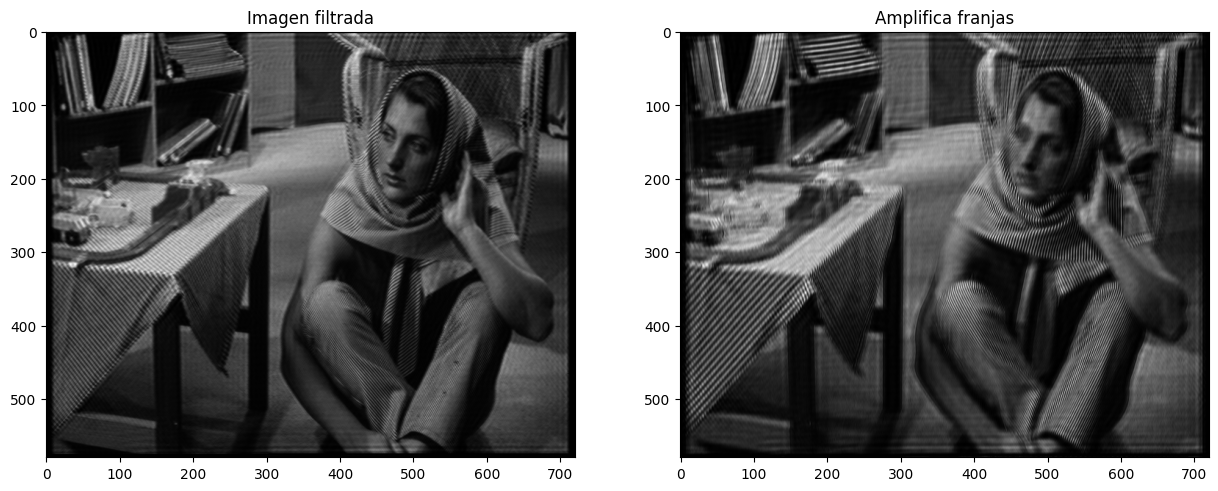

In [266]:
plt.figure(figsize = (15,15))

plt.subplot(2, 2, 1)
plt.title("Imagen filtrada")
plt.imshow(np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_tf*filtro1)))**2, cmap=cm.gray )

plt.subplot(2, 2, 2)
plt.title("Amplifica franjas")
plt.imshow(np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_tf*filtro2)))**2, cmap=cm.gray )
plt.show()


**11. Formación de imágenes por un sistema óptico limitado por difracción en iluminación incoherente: simulación de imágenes en el telescopio James Webb. Tomar como pupila de salida del sistema la imagen binaria suministrada y generar dos objetos  astronómicos con distribución de intensidad $I_g$. La imagen en la cámara del telescopio $I_i$ esta relacionada con $I_g$ a través de la expresión
$$I_i = |h|^2 * I_g$$
donde es la función impulso-respuesta del sistema. Calcular la función de transferencia
del telescopio y la imagen .**


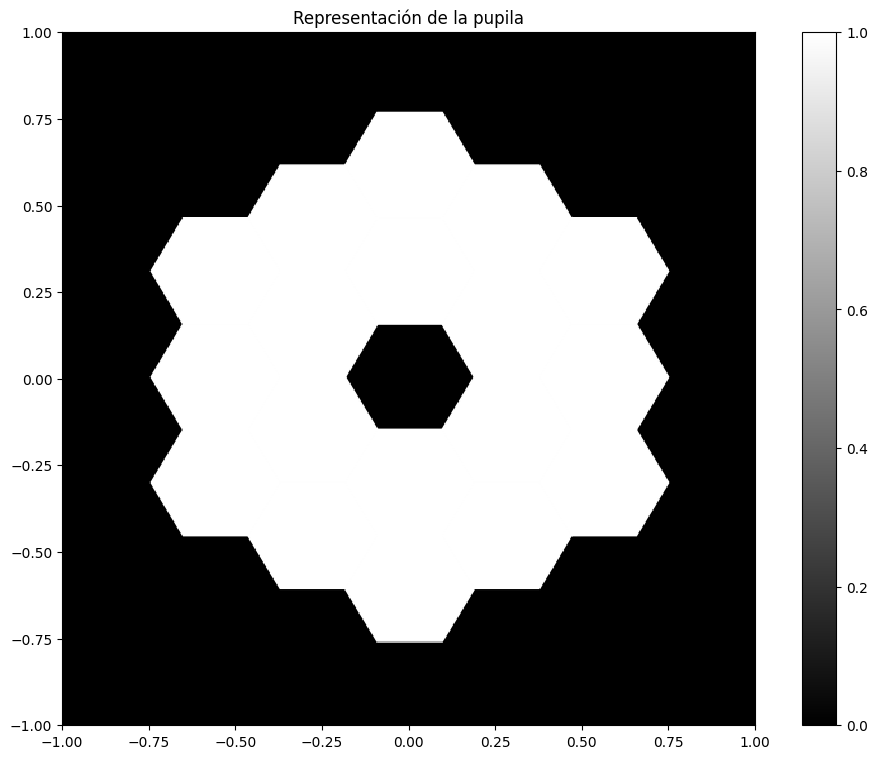

In [311]:
# la función imp-res es la imgagen 'Webb'

import matplotlib.image as img
pupila = img.imread("webb.png")[:,:,0]

Ny,Nx = pupila.shape[0],pupila.shape[1]
x = np.linspace(-1, 1, Nx)
y = np.linspace(-Ny/Nx, Ny/Nx, Ny)

# Representacion de la imagen

plt.figure(figsize = (12,9))
plt.imshow( pupila, interpolation="none", extent=(-1,1,-1,1), origin="lower", cmap="gray")
plt.title("Representación de la pupila")
plt.colorbar()
plt.show()




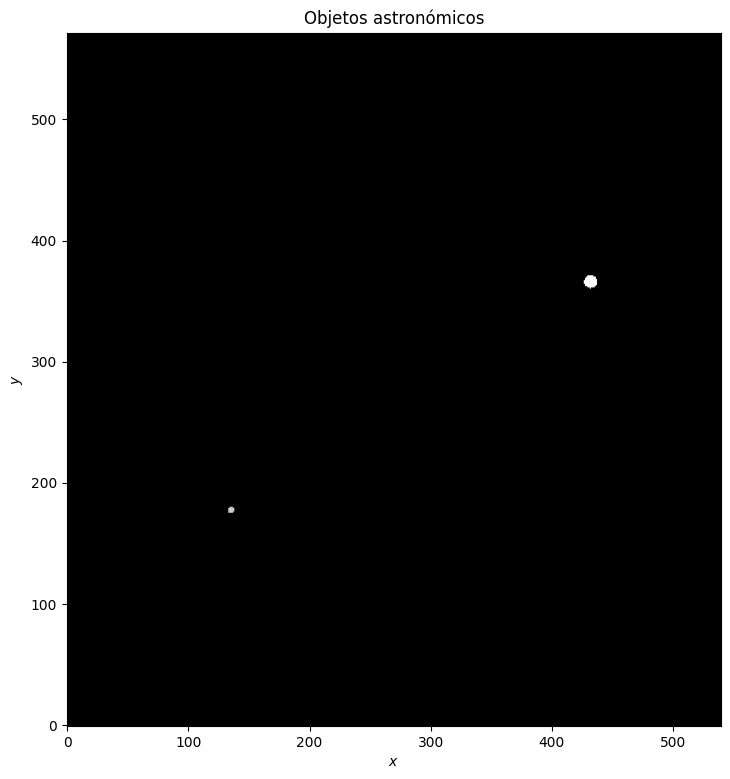

In [331]:
# Tomamos una imagen en principio negra (cielo oscuro):
cielo = np.zeros([Ny, Nx])

# Añadimos una estrella, situada en (x,y)=(x0,y0),
# de radio r0, por ejemplo:
x0, y0, r0 = 0.6,0.3,0.02
X,Y = np.meshgrid(x-x0, y-y0)
R = np.sqrt(X*X + Y*Y)
# Añadimos la estrella a la imagen (1's frente a 0's):
cielo[R <= r0] = 1

# Y añadimos otra estrella en (x,y)=(x0,y0) y radio r0:
x0, y0, r0 = -0.5,-0.4,0.01
X,Y = np.meshgrid(x-x0, y-y0)
R = np.sqrt(X*X + Y*Y)
# Añadimos la estrella a la imagen:
cielo[R <= r0] = 0.8

plt.figure(figsize = (12,9))
plt.imshow(cielo, cmap = cm.gray, origin='lower' )
plt.xlabel("$x $")
plt.ylabel("$y $")
plt.title("Objetos astronómicos")
plt.show()

In [332]:
# Hacemos las transformadas de Fourier:
FTpupila = np.fft.fftshift(np.fft.fft2(pupila))
filtro2 = np.fft.ifft2(abs(FTpupila)**2)
FTcielo = np.fft.fftshift(fft2(cielo))
# Multiplicamos el filtro con la FT de la imagen:
FTfinal = filtro2 * FTcielo
# Finalmente, hacemos la transformada inversa:
final = np.fft.ifft2(FTfinal)



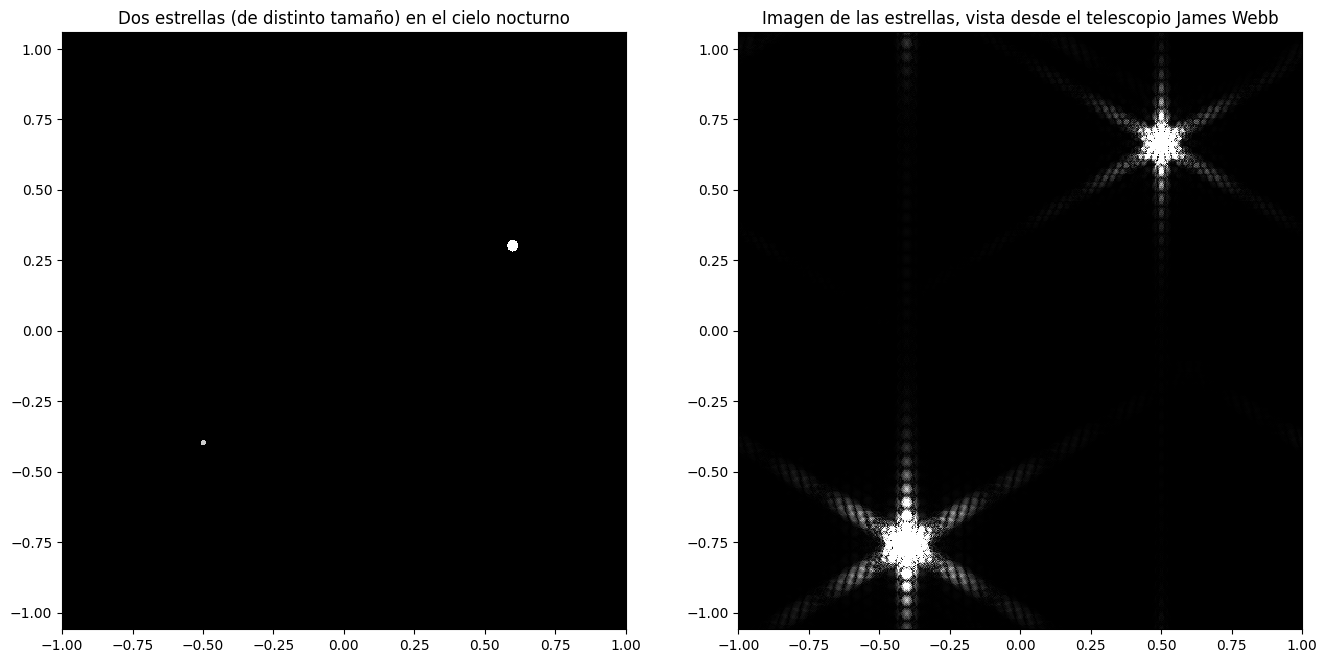

In [333]:
# Representación gráfica:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(cielo, interpolation="none", extent=(-1,1,-Ny/Nx,Ny/Nx), origin="lower",
cmap="gray")
ax[0].set_title("Dos estrellas (de distinto tamaño) en el cielo nocturno")
ax[1].imshow(abs(final), interpolation="none", extent=(-1,1,-Ny/Nx,Ny/Nx), origin="lower", cmap="gray", vmax=10)
ax[1].set_title("Imagen de las estrellas, vista desde el telescopio James Webb")
plt.show()

Esta es la imagen que se ve en el telescopio. Los destellos se deben a la geometría de la pupila, los espejos del telescopio.